# B-EAGLE SIMULATION NOTEBOOK

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter #to create the effect of gas spread
from math import sqrt

In [27]:
#function for modified gradient ascent
def nextLoc(x,y,I,delta,stepSize):
  dIx = (I['E']-I['W'])/(2*delta)
  dIy = (I['N']-I['S'])/(2*delta)
  lenI = sqrt(dIx**2+dIy**2)
  dx = stepSize*dIx/lenI; 
  dy = stepSize*dIy/lenI;
  return int(x+dx),int(y+dy)

# Constant gas intensity

## Simple case of single radial peak

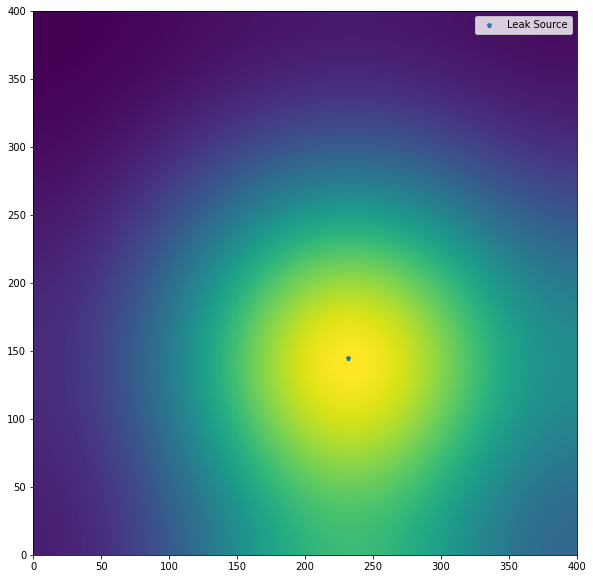

In [24]:
z = np.zeros((400,400))

# specify circle parameters: centre ij and radius
ci,cj=232,145
cr=5

# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(dist<cr)]= 1000
z = gaussian_filter(z, sigma=100)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci,cj,'p', markersize=cr,label = 'Leak Source')

plt.legend()
ax.set_aspect('equal')
plt.show()

In [25]:
x0 = 50;y0 = 300;stepSize = 10;
x = x0;y = y0;delta = 5; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = [[x,y]]
for k in range(10000):
  x,y = nextLoc(x,y,I,delta,stepSize)
  trajectory.append([x,y])
  try:
    error = sqrt((trajectory[-1][0]-trajectory[-3][0])**2+(trajectory[-1][1]-trajectory[-3][1])**2)
    if error<=stepSize:
      print('number of iterations taken to settle = ',k)
      print('distance travelled = ',k*stepSize)
      break
  except:
    pass 
  #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
  I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}

trajectory = np.array(trajectory)

number of iterations taken to settle =  25
distance travelled =  250


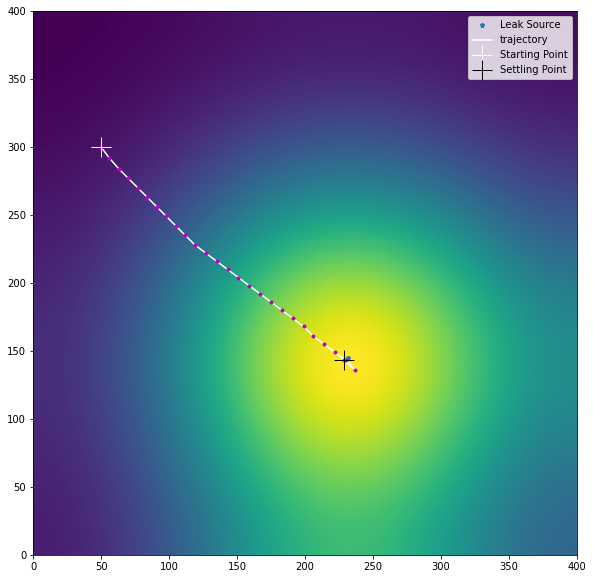

In [26]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')
plt.plot(ci,cj,'p', markersize=cr,label = 'Leak Source')
plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
plt.plot(trajectory[:,0],trajectory[:,1],'m.')
plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Settling Point')
plt.legend()
plt.show()

In [7]:
print('number of iterations taken to settle = ',k)

number of iterations taken to settle =  10


## Elongated distribution (3 centered)

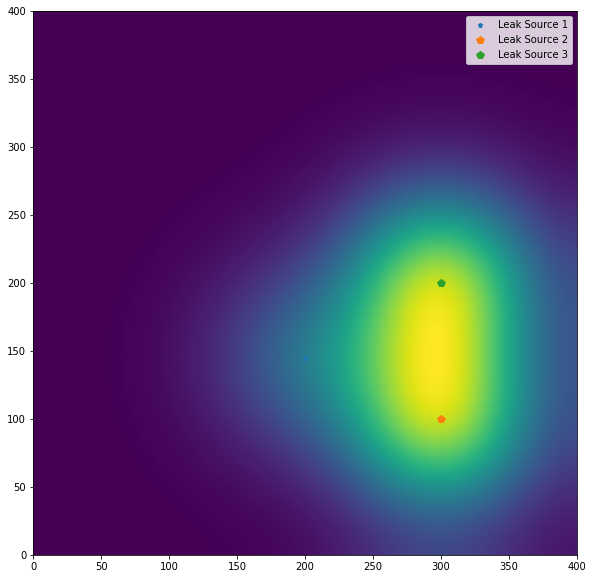

In [8]:
z = np.zeros((400,400))

# specify circle parameters: centre ij and radius
ci1,cj1=200,145
cr1=5

# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist1=np.sqrt((I-ci1)**2+(J-cj1)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(dist1<cr1)]= 1000

ci2,cj2=300,100
cr2=8
dist2=np.sqrt((I-ci2)**2+(J-cj2)**2)
z[np.where(dist2<cr2)]= 1000

ci3,cj3=300,200
cr3=8
dist3=np.sqrt((I-ci3)**2+(J-cj3)**2)
z[np.where(dist3<cr3)]= 1000


z = gaussian_filter(z, sigma=50)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
#plt.plot(ci4,cj4,'p', markersize=cr4/5,label = 'Leak Source 4')
plt.legend()
ax.set_aspect('equal')
plt.show()

In [9]:
x0 = 50;y0 = 350;stepSize = 10;
x = x0;y = y0;delta = 30; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = [[x,y]]
for k in range(100):
  x,y = nextLoc(x,y,I,delta,stepSize)
  trajectory.append([x,y])
  try:
    error = sqrt((trajectory[-1][0]-trajectory[-3][0])**2+(trajectory[-1][1]-trajectory[-3][1])**2)
    if error<=stepSize:
      print('number of iterations taken to settle = ',k)
      print('distance travelled = ',k*stepSize)
      break
  except:
    pass  
  #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
  I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}

trajectory = np.array(trajectory)

number of iterations taken to settle =  35
distance travelled =  350


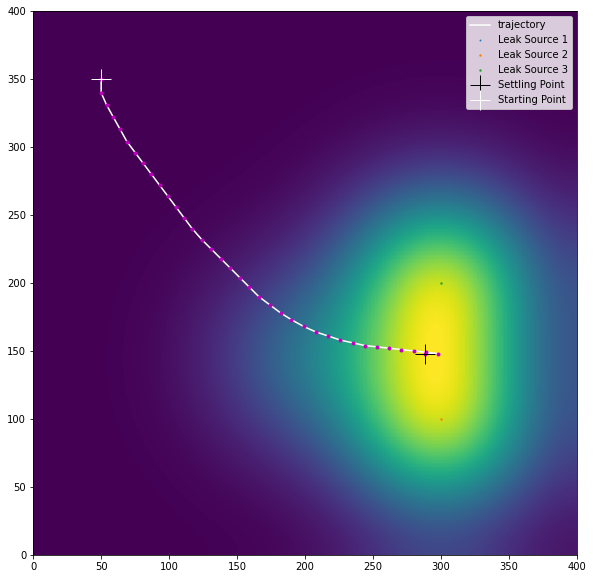

In [10]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')


plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
plt.plot(trajectory[:,0],trajectory[:,1],'m.')
plt.plot(ci1,cj1,'p', markersize=cr1/5,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2/5,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3/5,label = 'Leak Source 3')
#plt.plot(ci4,cj4,'p', markersize=cr4/5,label = 'Leak Source 4')
plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Settling Point')
plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
plt.legend()
plt.show()

In [11]:
print('number of iterations taken to settle = ',k)

number of iterations taken to settle =  35


## A much complex gas leak: 3 sources and 1 distant source

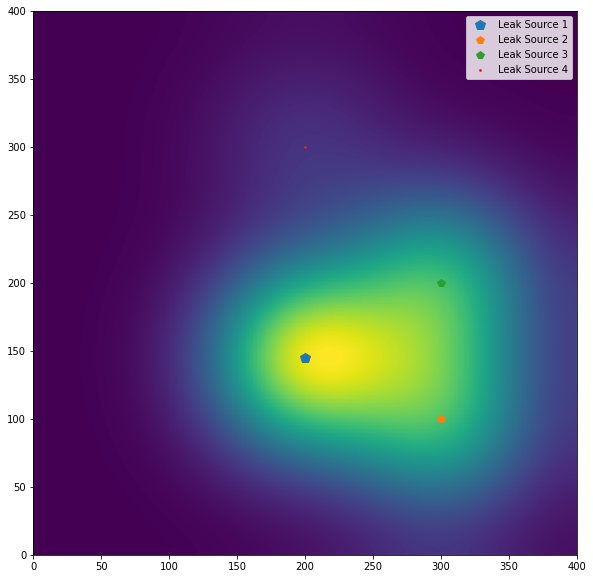

In [12]:
z = np.zeros((400,400))

# specify circle parameters: centre ij and radius
ci1,cj1=200,145
cr1=10

# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist1=np.sqrt((I-ci1)**2+(J-cj1)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(np.logical_and(dist1<cr1,J<160))]= 1000

ci2,cj2=300,100
cr2=8
dist2=np.sqrt((I-ci2)**2+(J-cj2)**2)
z[np.where(dist2<cr2)]= 1000

ci3,cj3=300,200
cr3=8
dist3=np.sqrt((I-ci3)**2+(J-cj3)**2)
z[np.where(dist3<cr3)]= 1000

ci4,cj4=200,300
cr4=2
dist4=np.sqrt((I-ci4)**2+(J-cj4)**2)
z[np.where(dist4<cr4)]= 5000


z = gaussian_filter(z, sigma=50)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
plt.plot(ci4,cj4,'p', markersize=cr4,label = 'Leak Source 4')
plt.legend()
ax.set_aspect('equal')
plt.show()

In [13]:
x0 = 50;y0 = 350;stepSize = 10;
x = x0;y = y0;delta = 5; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = [[x,y]]
for k in range(50):
  x,y = nextLoc(x,y,I,delta,stepSize)
  trajectory.append([x,y])
  try:
    error = sqrt((trajectory[-1][0]-trajectory[-3][0])**2+(trajectory[-1][1]-trajectory[-3][1])**2)
    if error<=stepSize:
      print('number of iterations taken to settle = ',k)
      print('distance travelled = ',k*stepSize)
      break
  except:
    pass
  #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
  I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}

trajectory = np.array(trajectory)

number of iterations taken to settle =  32


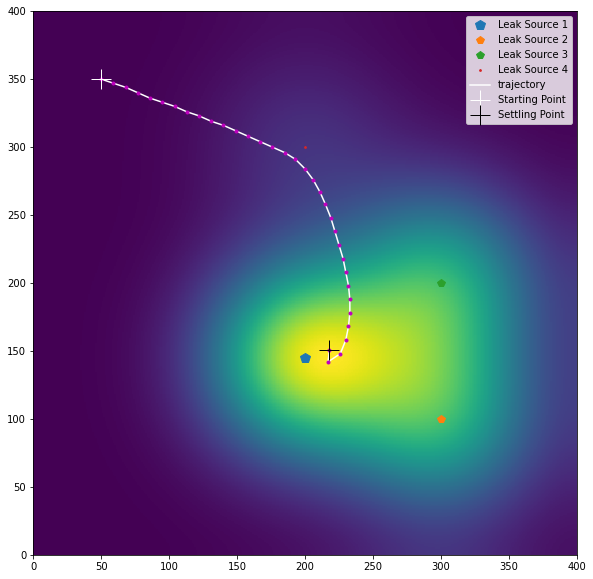

In [14]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
plt.plot(ci4,cj4,'p', markersize=cr4,label = 'Leak Source 4')
plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
plt.plot(trajectory[:,0],trajectory[:,1],'m.')
plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Settling Point')
plt.legend()
plt.show()

In [15]:
print('number of iterations taken to settle = ',k)

number of iterations taken to settle =  32


### Settling at local maxima

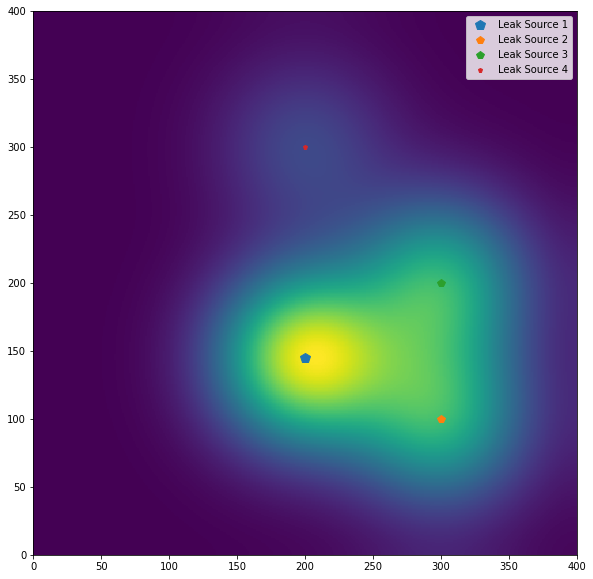

In [39]:
z = np.zeros((400,400))

# specify circle parameters: centre ij and radius
ci1,cj1=200,145
cr1=10

# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist1=np.sqrt((I-ci1)**2+(J-cj1)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(np.logical_and(dist1<cr1,J<160))]= 1000

ci2,cj2=300,100
cr2=8
dist2=np.sqrt((I-ci2)**2+(J-cj2)**2)
z[np.where(dist2<cr2)]= 1000

ci3,cj3=300,200
cr3=8
dist3=np.sqrt((I-ci3)**2+(J-cj3)**2)
z[np.where(dist3<cr3)]= 1000

ci4,cj4=200,300
cr4=5
dist4=np.sqrt((I-ci4)**2+(J-cj4)**2)
z[np.where(dist4<cr4)]= 1000


z = gaussian_filter(z, sigma=45)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
plt.plot(ci4,cj4,'p', markersize=cr4,label = 'Leak Source 4')
plt.legend()
ax.set_aspect('equal')
plt.show()

In [40]:
x0 = 50;y0 = 350;stepSize = 10;
x = x0;y = y0;delta = 10; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = [[x,y]]
for k in range(50):
  x,y = nextLoc(x,y,I,delta,stepSize)
  trajectory.append([x,y])
  try:
    error = sqrt((trajectory[-1][0]-trajectory[-3][0])**2+(trajectory[-1][1]-trajectory[-3][1])**2)
    if error<=stepSize:
      print('number of iterations taken to settle = ',k)
      print('distance travelled = ',k*stepSize)
      break
  except:
    pass
  #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
  I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}

trajectory = np.array(trajectory)

number of iterations taken to settle =  18
distance travelled =  180


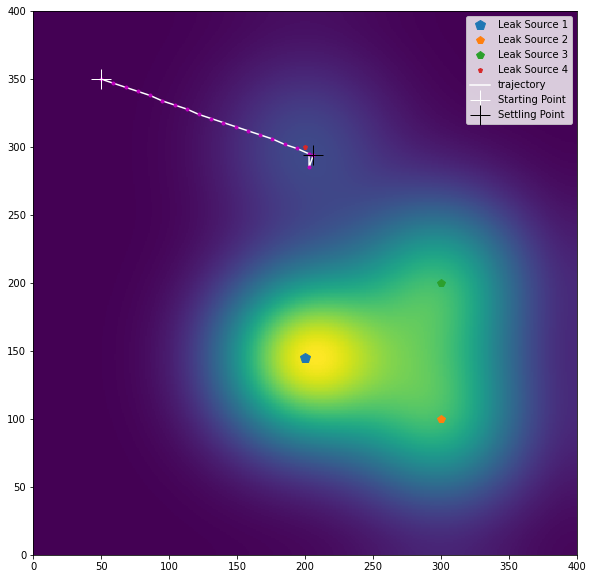

In [41]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
plt.plot(ci4,cj4,'p', markersize=cr4,label = 'Leak Source 4')
plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
plt.plot(trajectory[:,0],trajectory[:,1],'m.')
plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Settling Point')
plt.legend()
plt.show()

# Case of Changing gas intensity

In [16]:
import imageio

## Single point leak

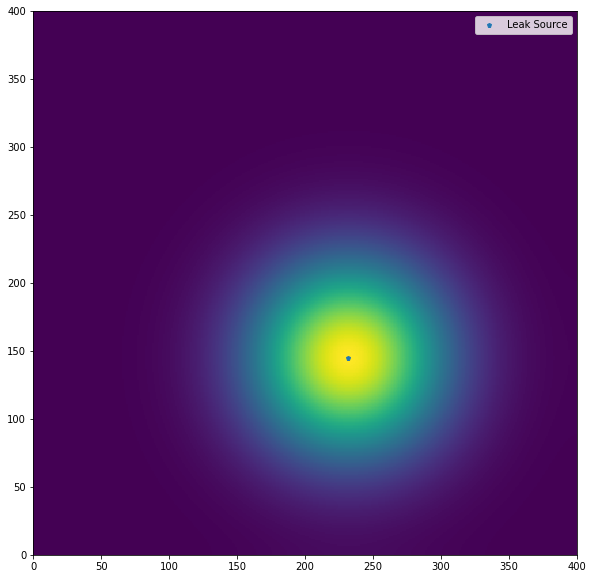

In [17]:
z = np.zeros((400,400))
# specify circle parameters: centre ij and radius
ci,cj=232,145
cr=5

# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(dist<cr)]= 1000
z = gaussian_filter(z, sigma=50)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci,cj,'p', markersize=cr,label = 'Leak Source')

plt.legend()
ax.set_aspect('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

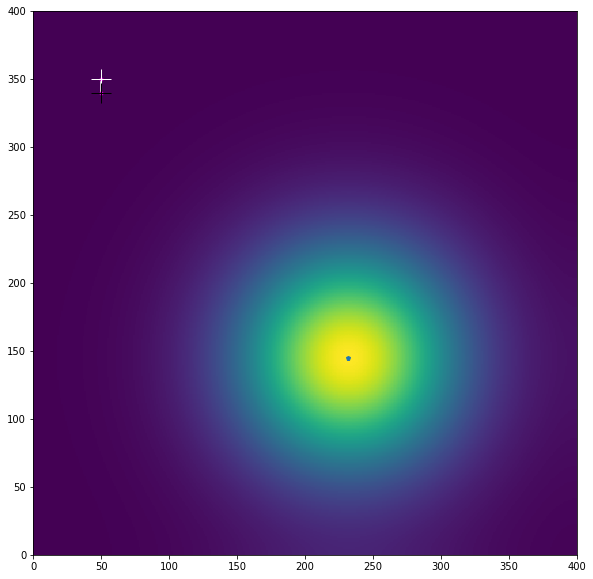

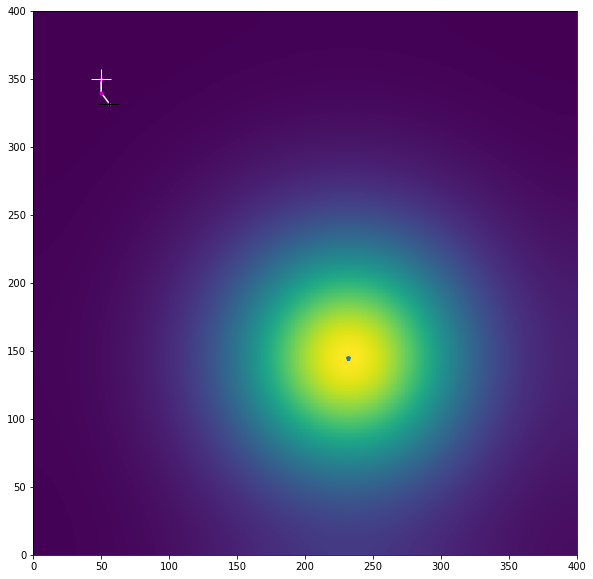

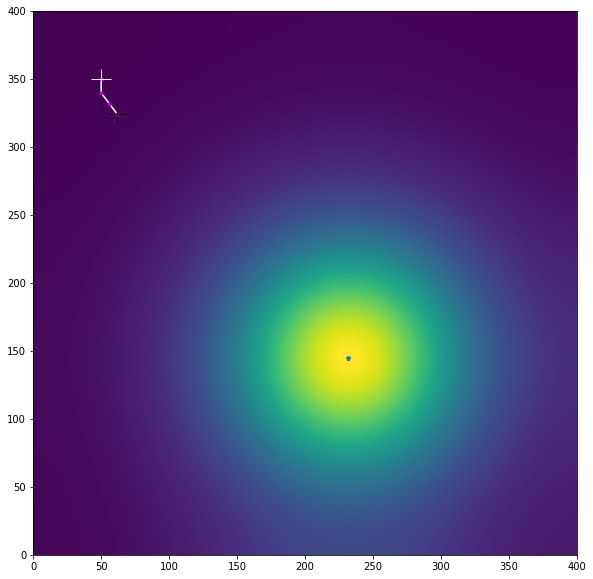

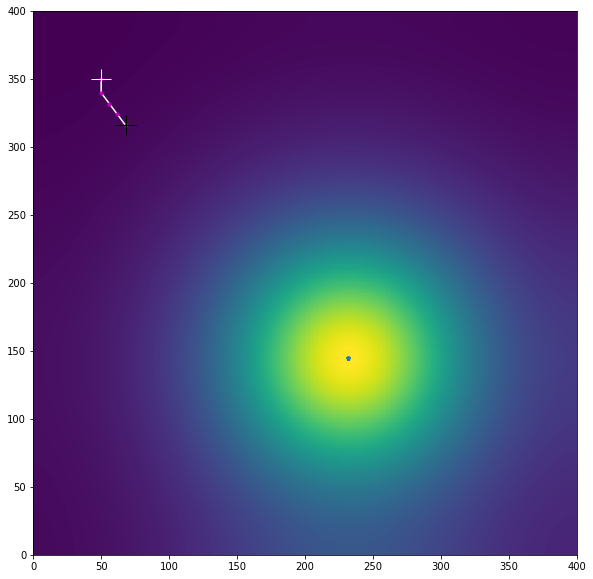

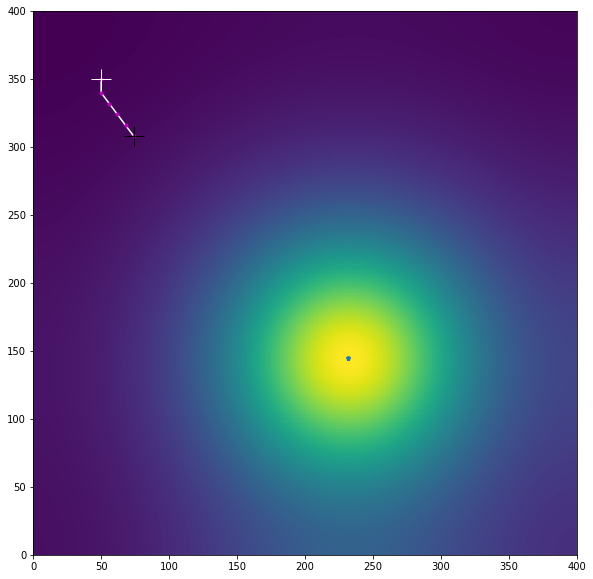

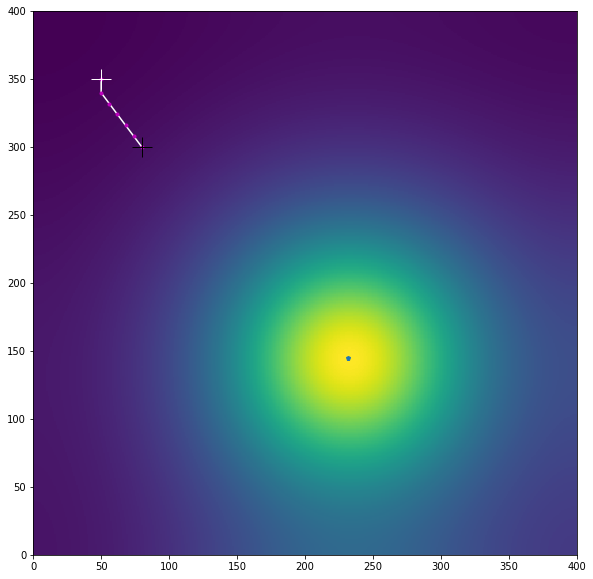

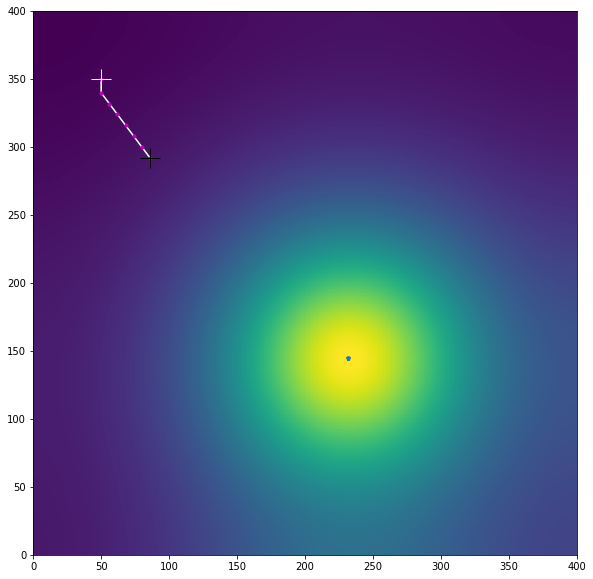

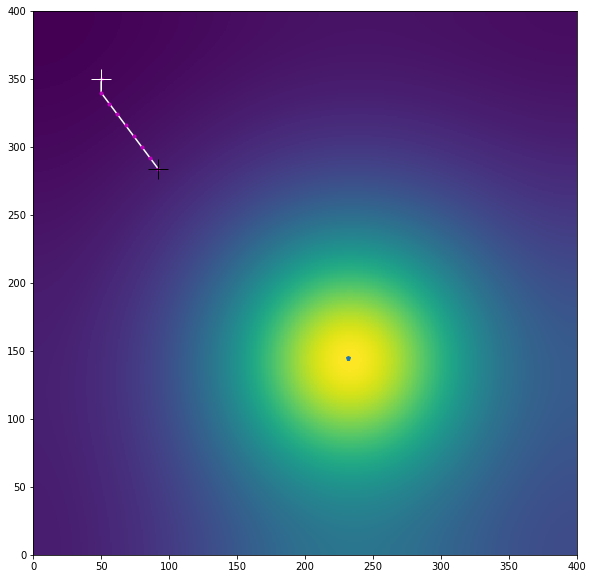

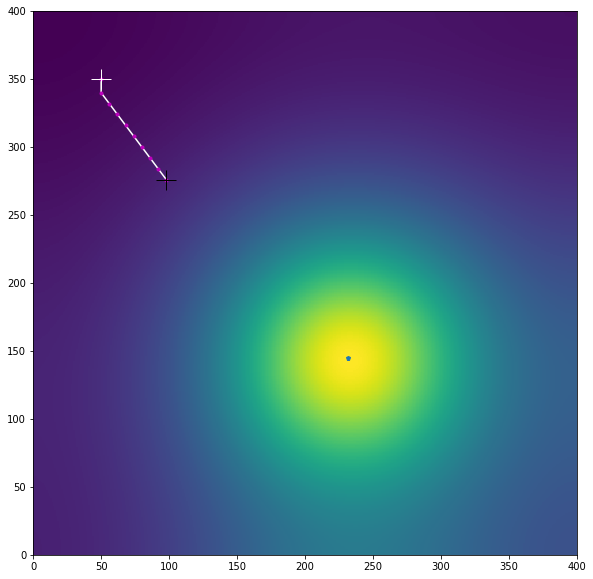

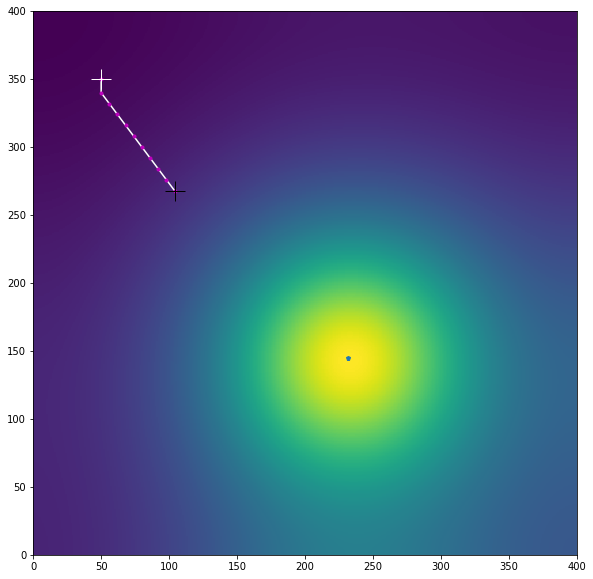

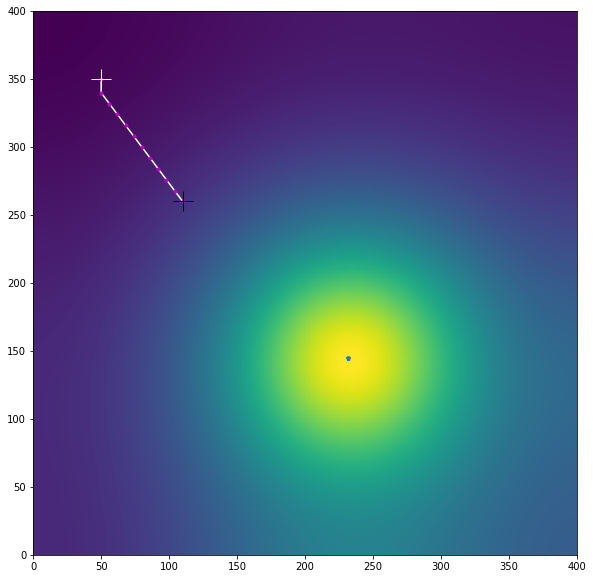

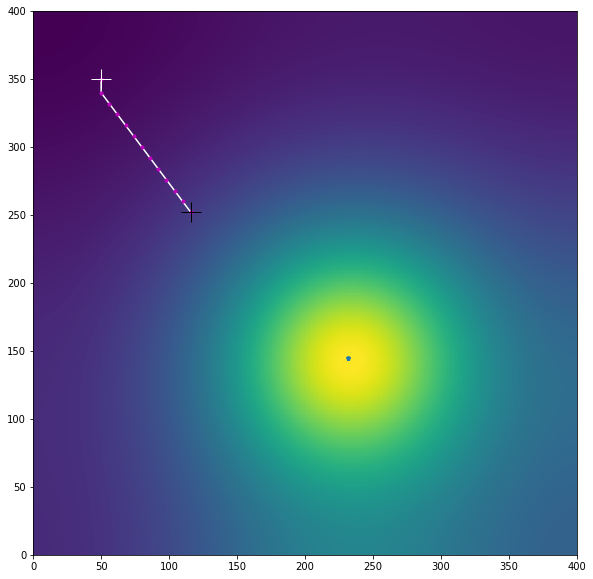

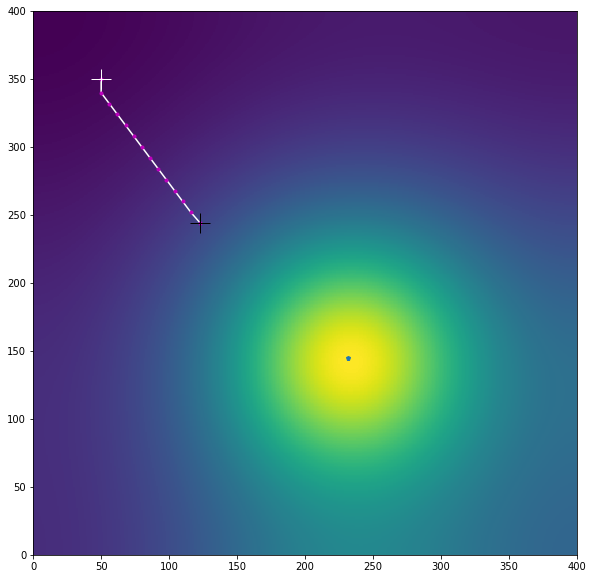

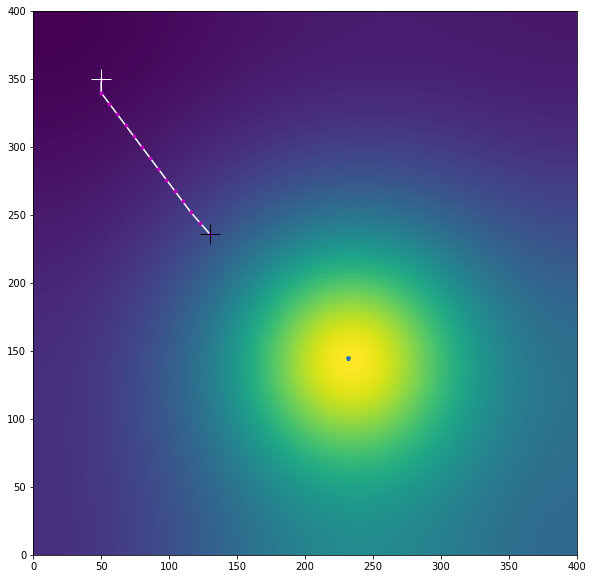

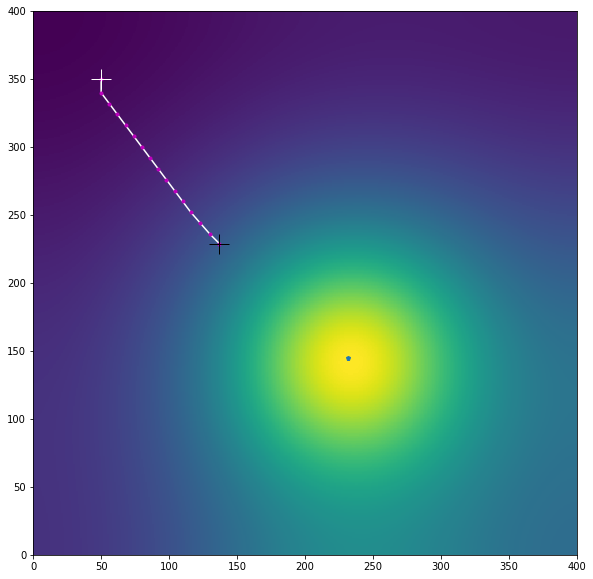

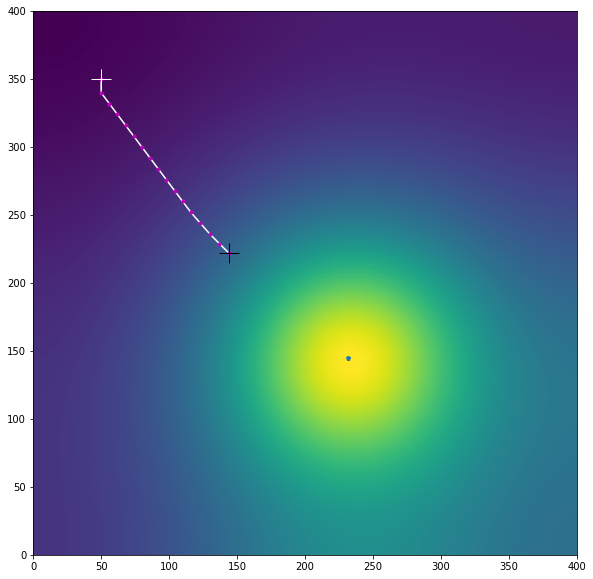

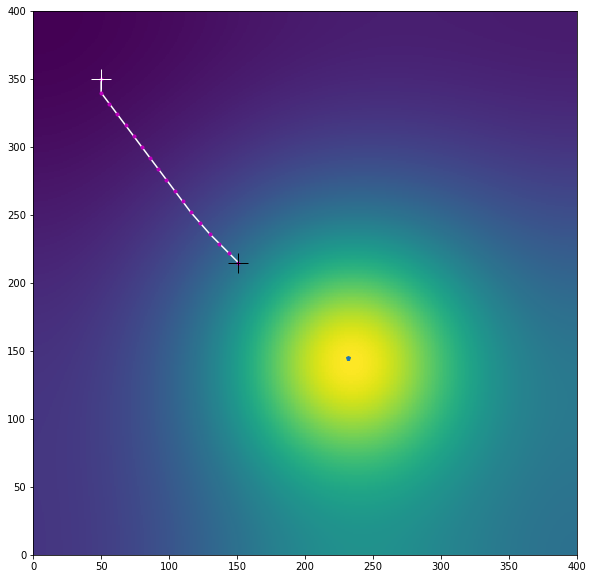

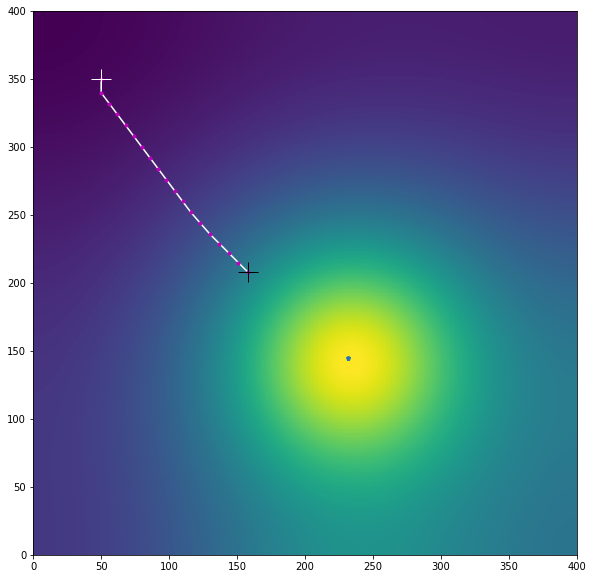

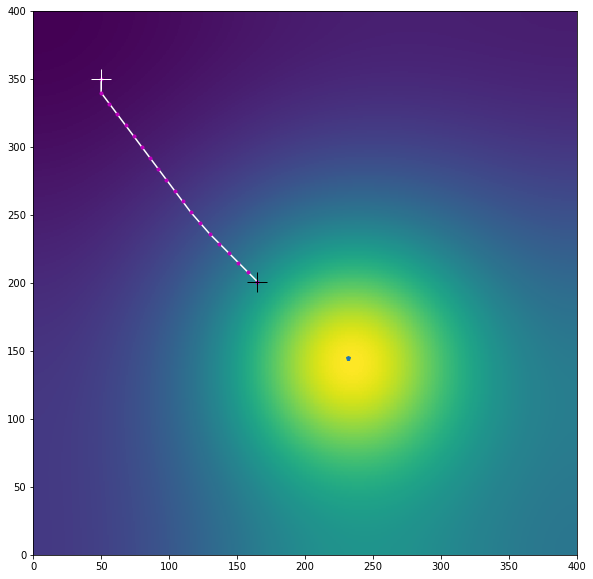

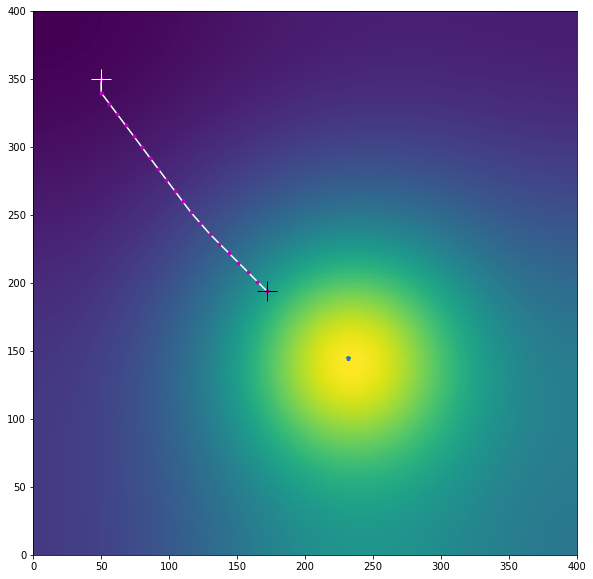

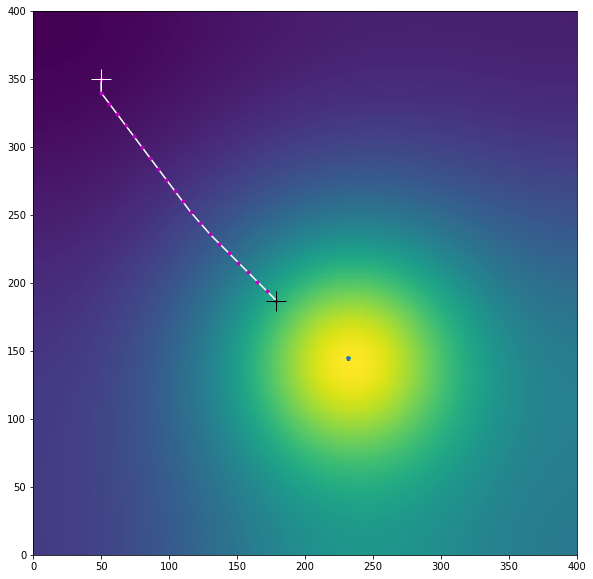

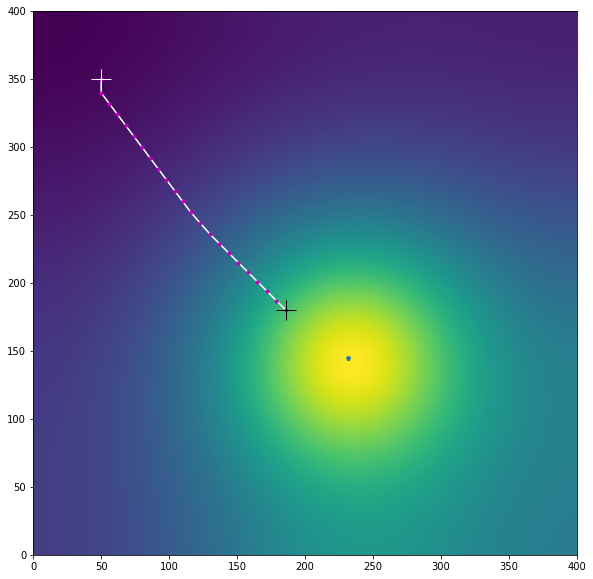

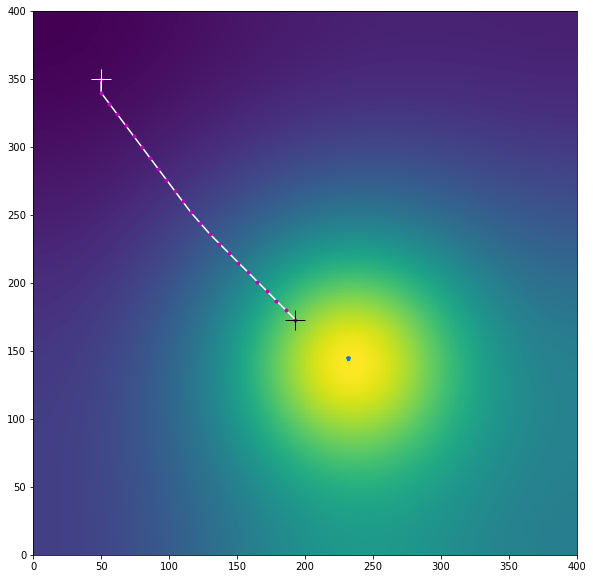

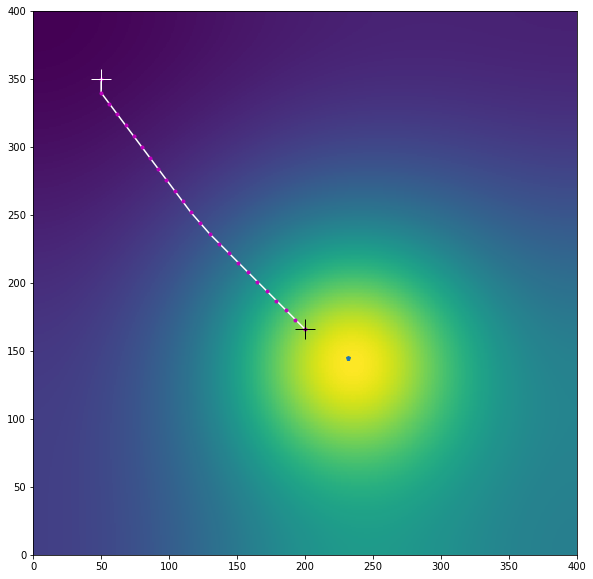

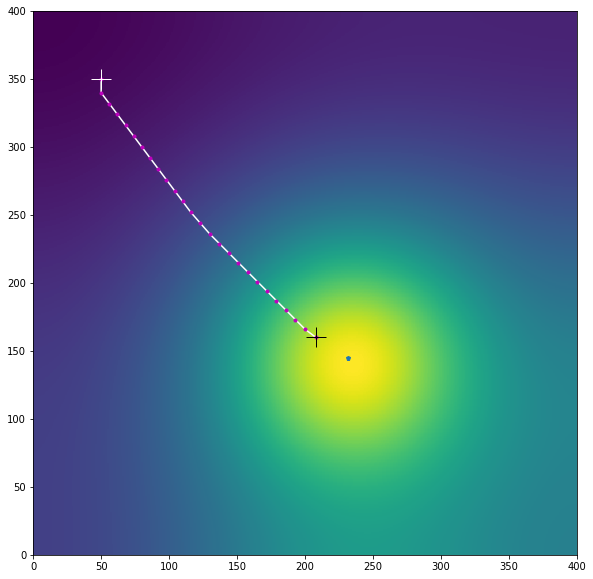

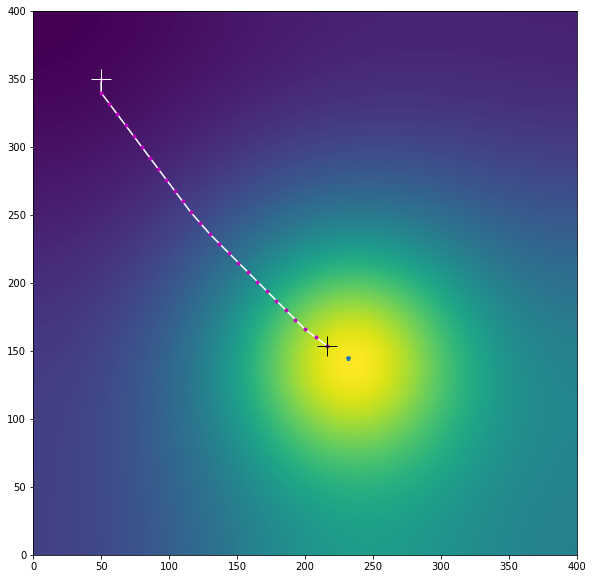

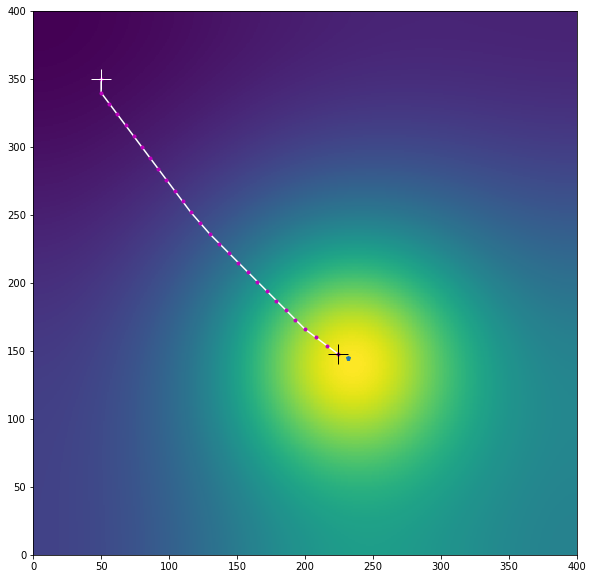

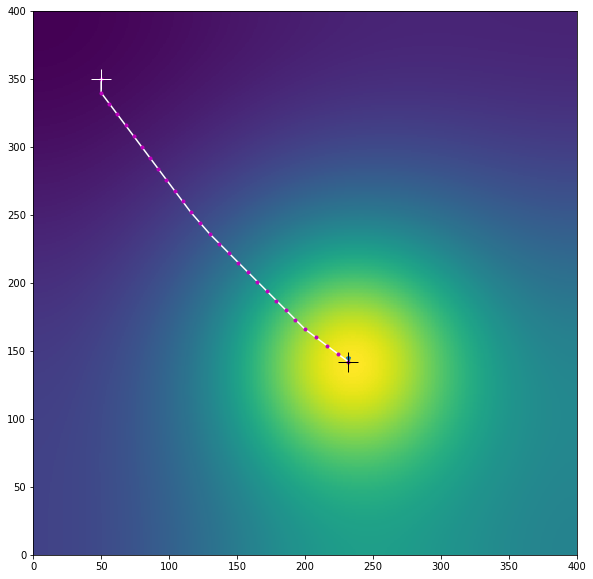

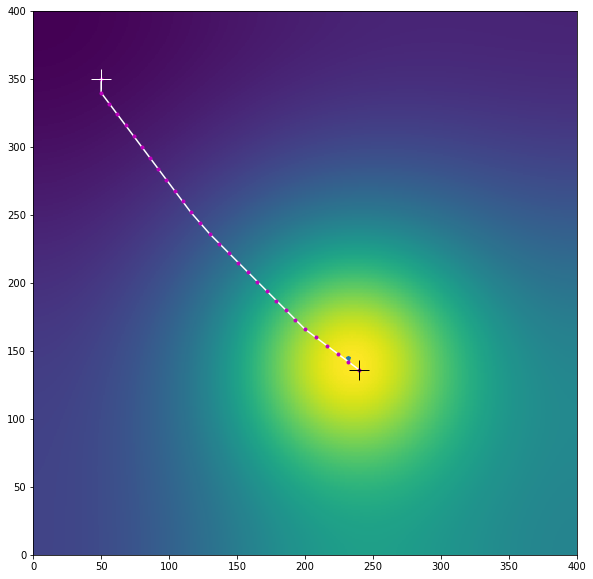

In [18]:
x0 = 50;y0 = 350;stepSize = 10;
x = x0;y = y0;delta = 5; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = np.array([[x,y]])

with imageio.get_writer('singlePoint.gif',mode='I') as writer:
  for k in range(50):
    x,y = nextLoc(x,y,I,delta,stepSize)
    trajectory = np.append(trajectory, np.array([[x,y]]), axis=0)
    #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
    try:
      error = sqrt((trajectory[-1,0]-trajectory[-3,0])**2+(trajectory[-1,1]-trajectory[-3,1])**2)
      if error<stepSize:
        break
    except:
      pass 
    z[np.where(dist<cr)]= 1000+50*k
    z = gaussian_filter(z, sigma=50)
    I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
    fig=plt.figure(figsize = (10,10))
    ax=fig.add_subplot(111)
    ax.pcolormesh(z)
    ax.set_aspect('equal')
    plt.plot(ci,cj,'p', markersize=cr,label = 'Leak Source')
    plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
    plt.plot(trajectory[:,0],trajectory[:,1],'m.')
    plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
    plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Current Position')
    #plt.legend()
    plt.savefig('this.png')
    image = imageio.imread('this.png')
    writer.append_data(image)  



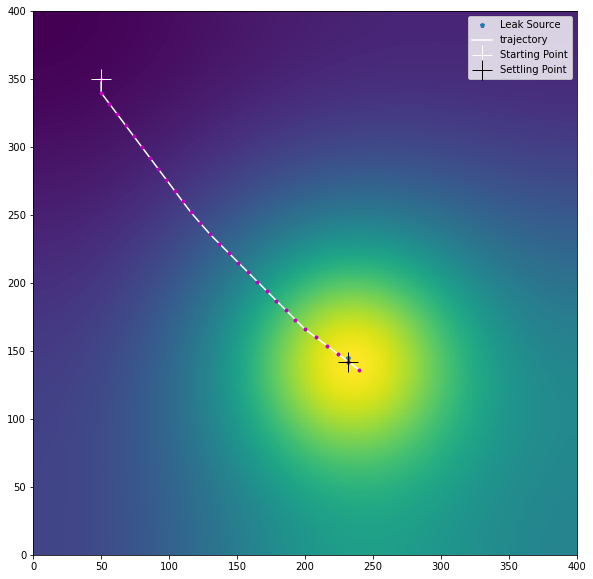

In [19]:
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
ax.set_aspect('equal')
plt.plot(ci,cj,'p', markersize=cr,label = 'Leak Source')
plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
plt.plot(trajectory[:,0],trajectory[:,1],'m.')
plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Settling Point')
plt.legend()
plt.show()

In [20]:
print('number of iterations taken to settle = ',k)

number of iterations taken to settle =  29


## 3 point leak

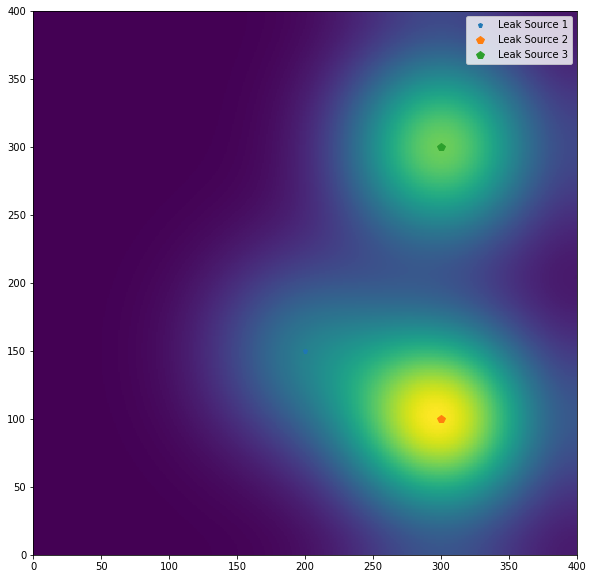

In [21]:
z = np.zeros((400,400))

# specify circle parameters: centre ij and radius
ci1,cj1=200,150
cr1=5
int1 = 1000
# Create index arrays to z
I,J=np.meshgrid(np.arange(z.shape[0]),np.arange(z.shape[1]))

# calculate distance of all points to centre
dist1=np.sqrt((I-ci1)**2+(J-cj1)**2)

# Assign value of 1 to those points where dist<cr:
z[np.where(dist1<cr1)]= int1

ci2,cj2=300,100
cr2=8
int2 = 1000
dist2=np.sqrt((I-ci2)**2+(J-cj2)**2)
z[np.where(dist2<cr2)]= int2

ci3,cj3=300,300
cr3=8
int3 = 800
dist3=np.sqrt((I-ci3)**2+(J-cj3)**2)
z[np.where(dist3<cr3)]= int3


z = gaussian_filter(z, sigma=50)
# show result in a simple plot
fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(111)
ax.pcolormesh(z)
plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
#plt.plot(ci4,cj4,'p', markersize=cr4/5,label = 'Leak Source 4')
plt.legend()
ax.set_aspect('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

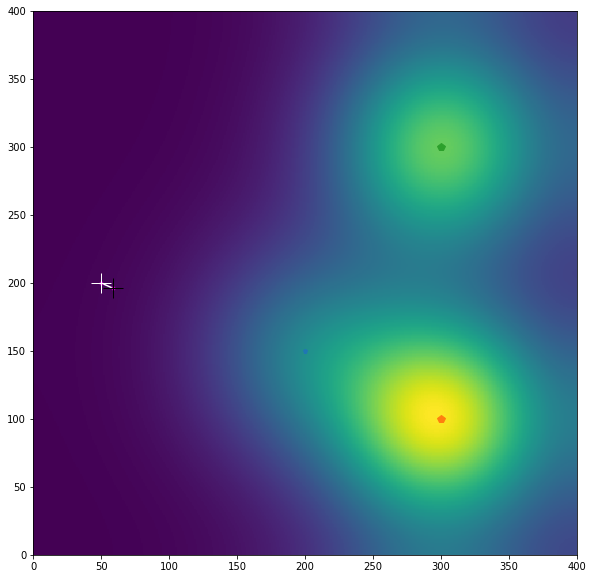

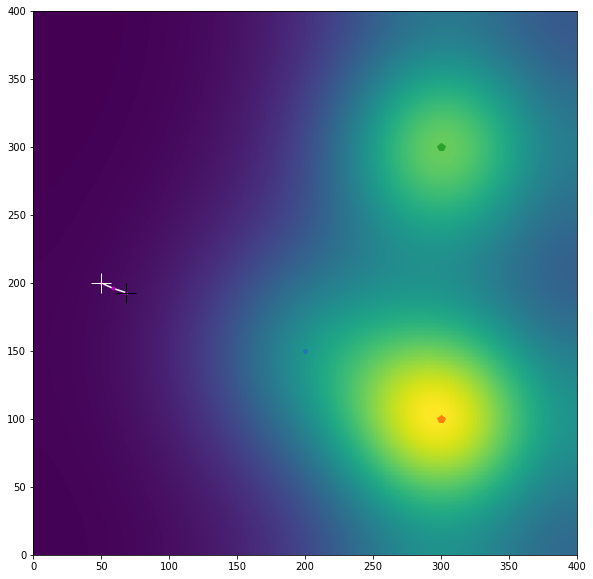

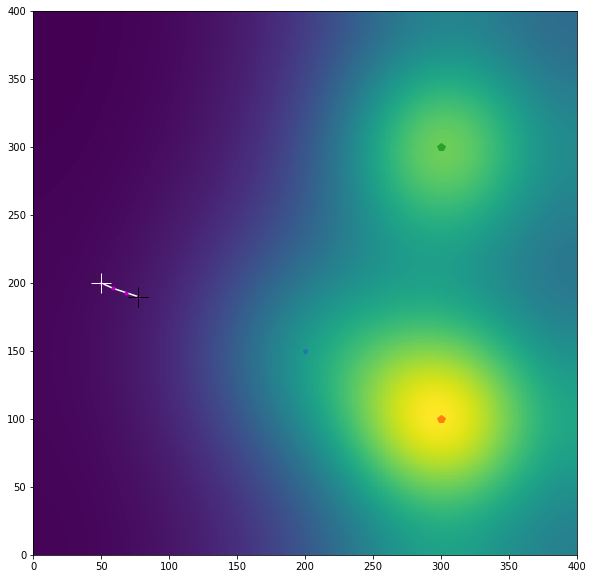

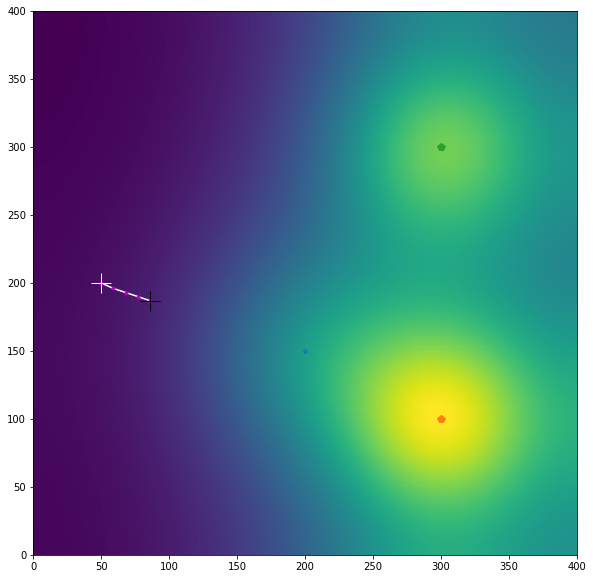

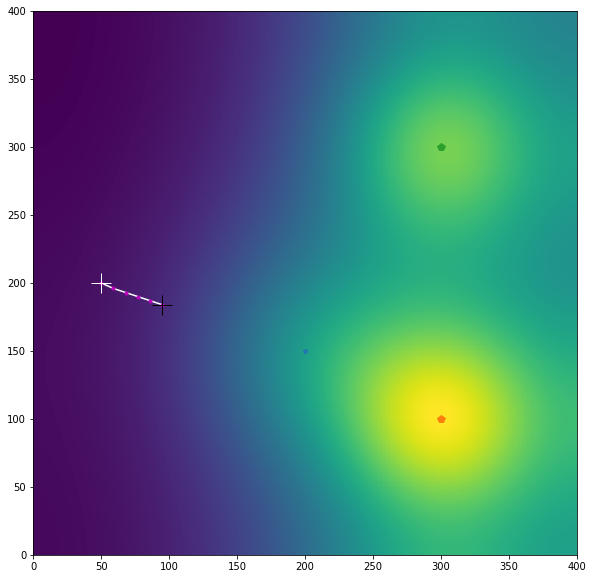

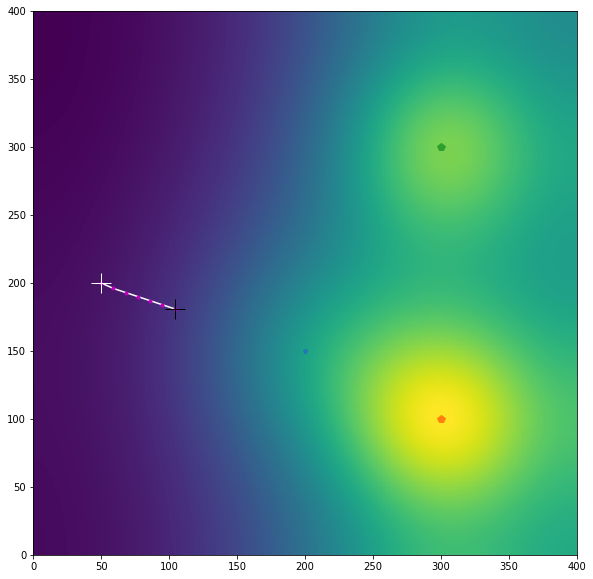

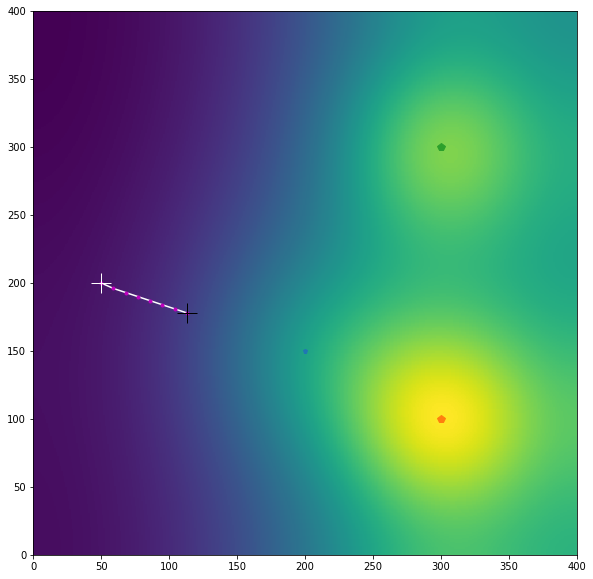

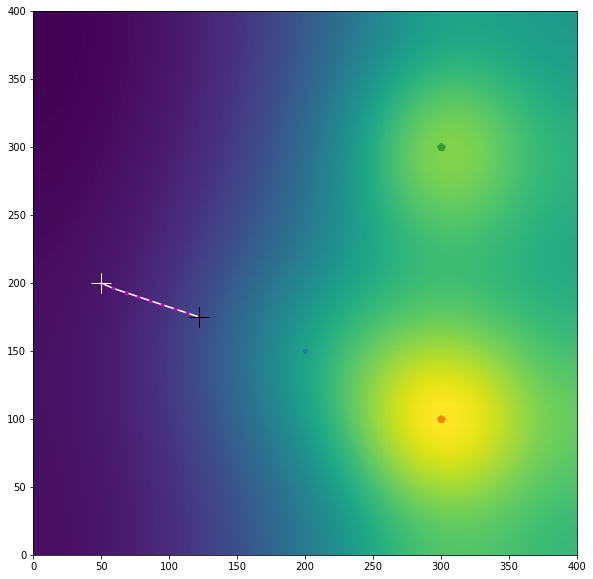

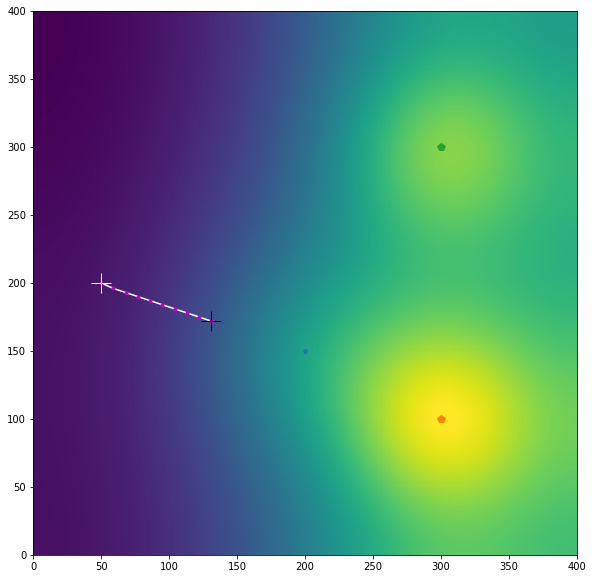

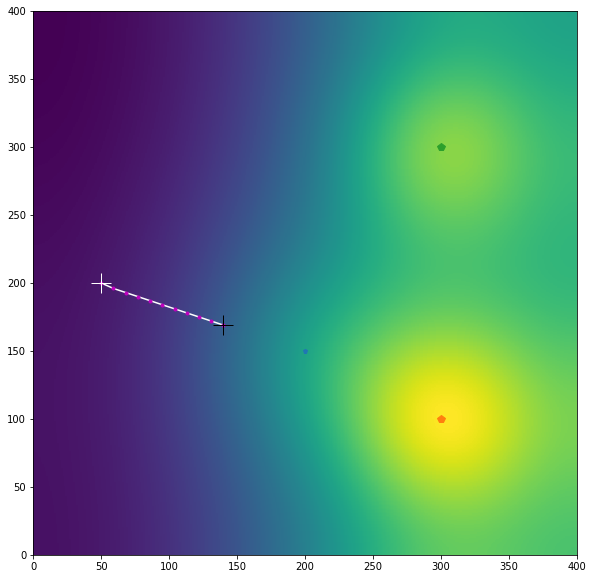

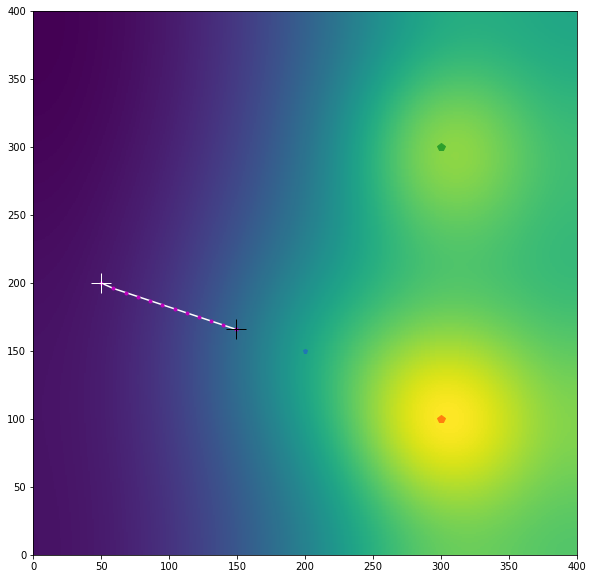

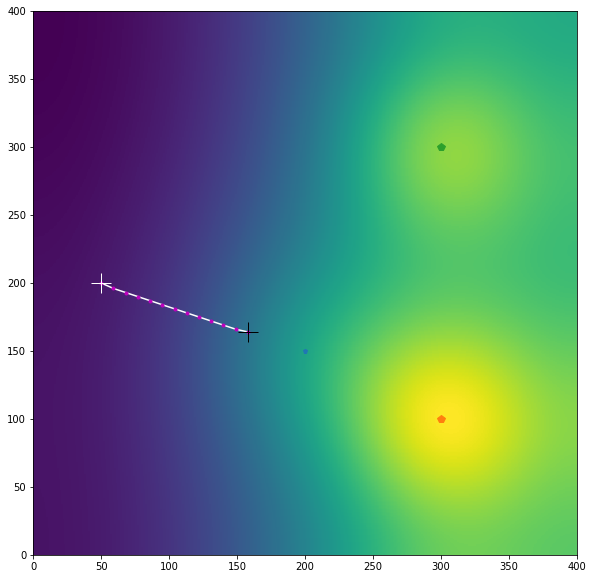

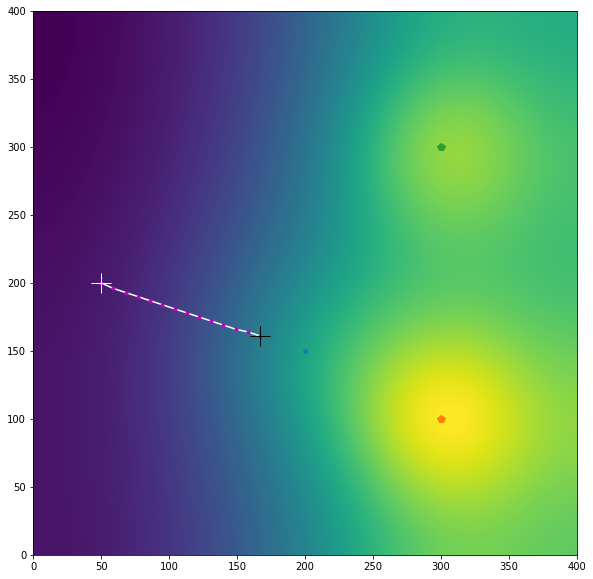

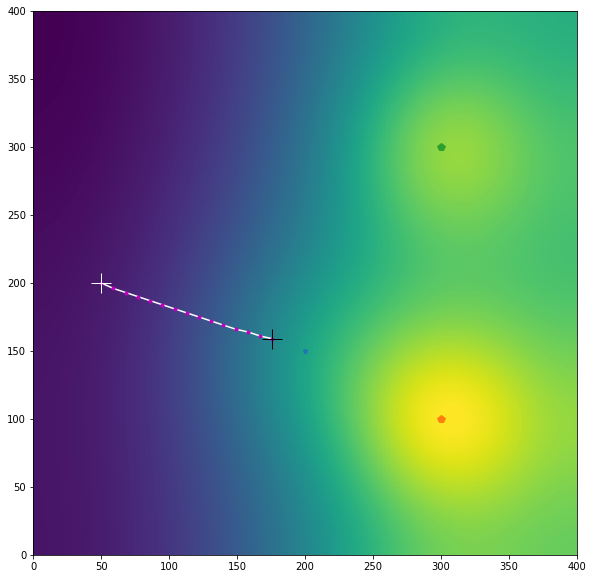

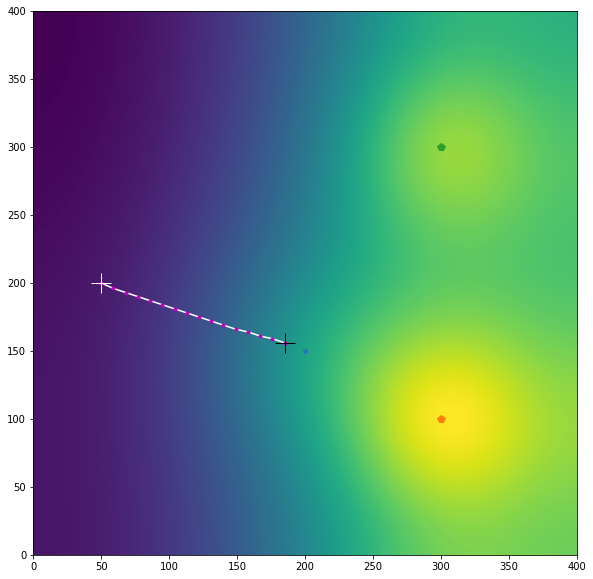

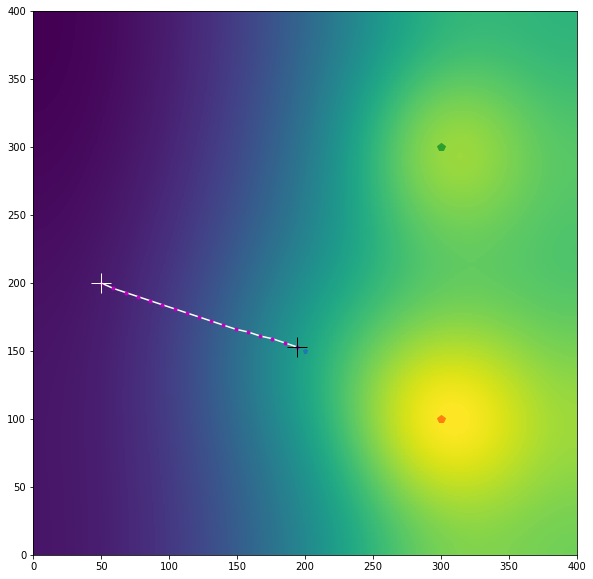

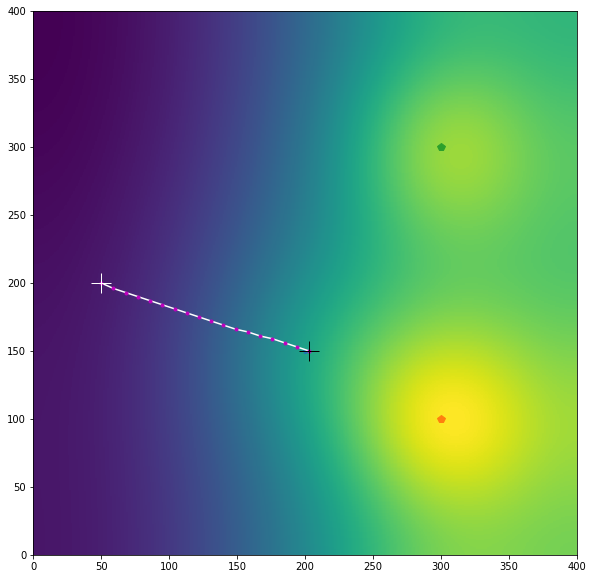

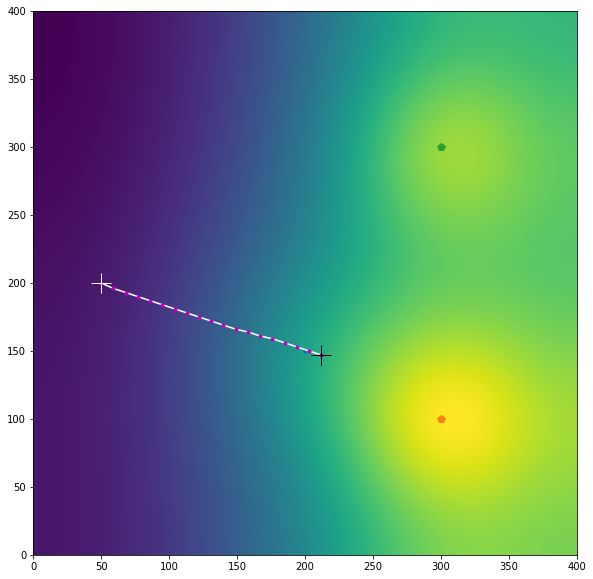

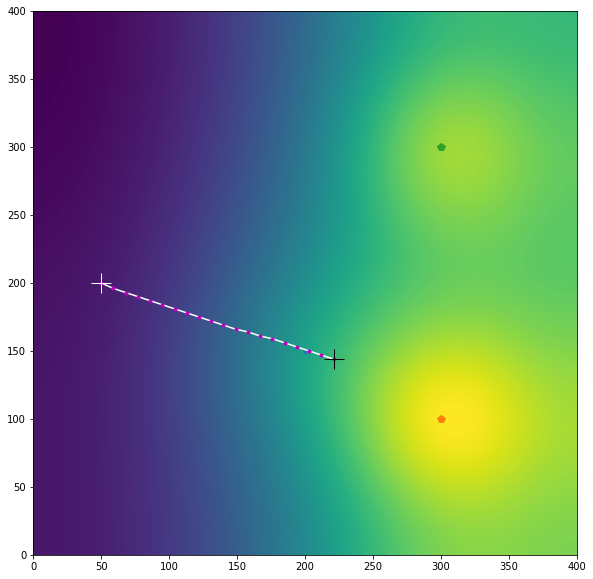

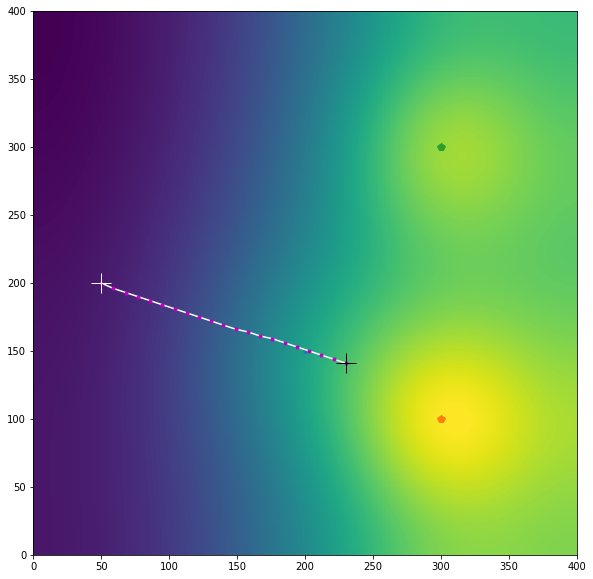

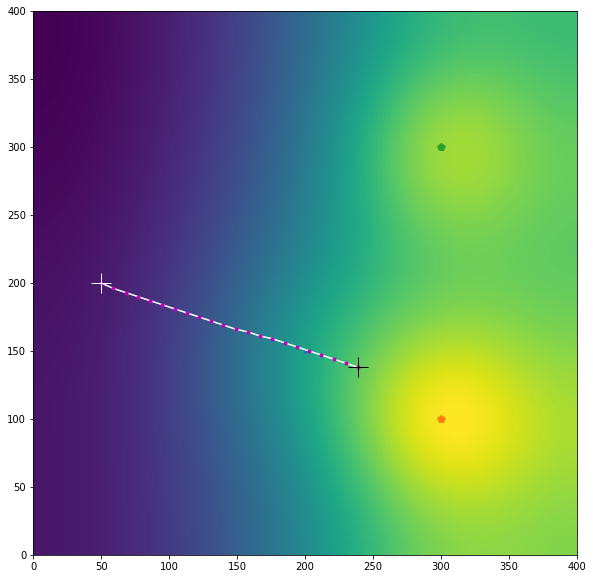

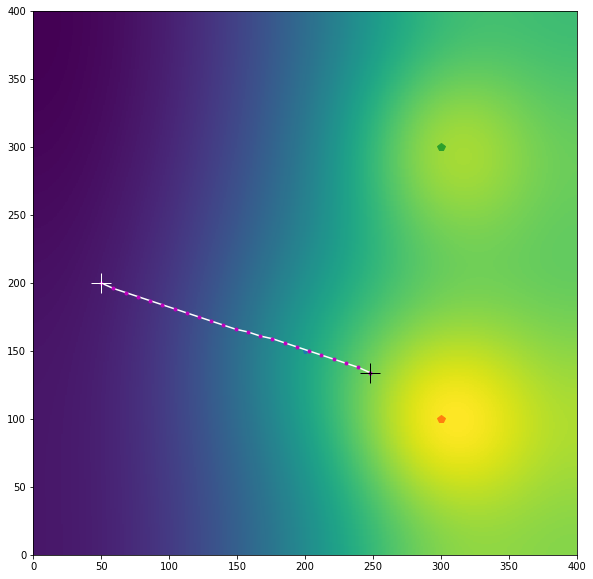

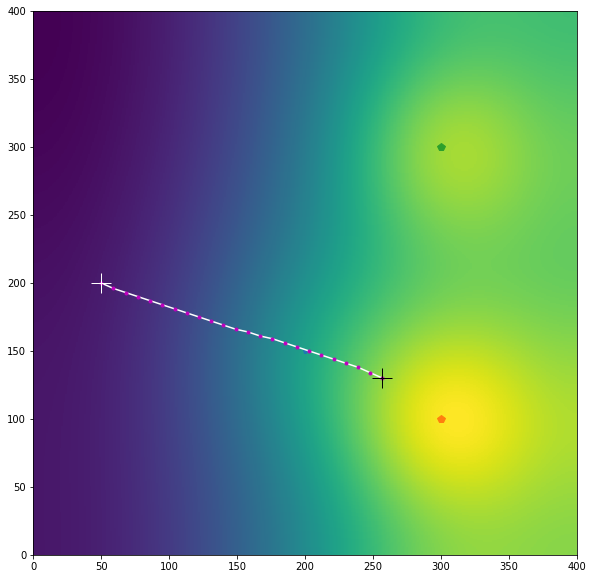

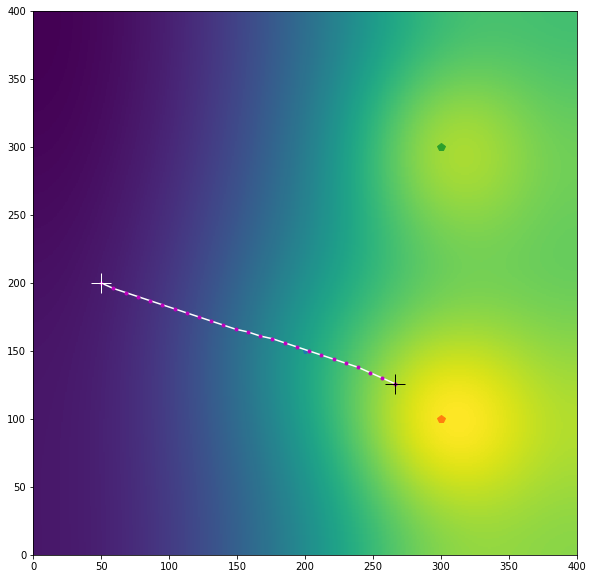

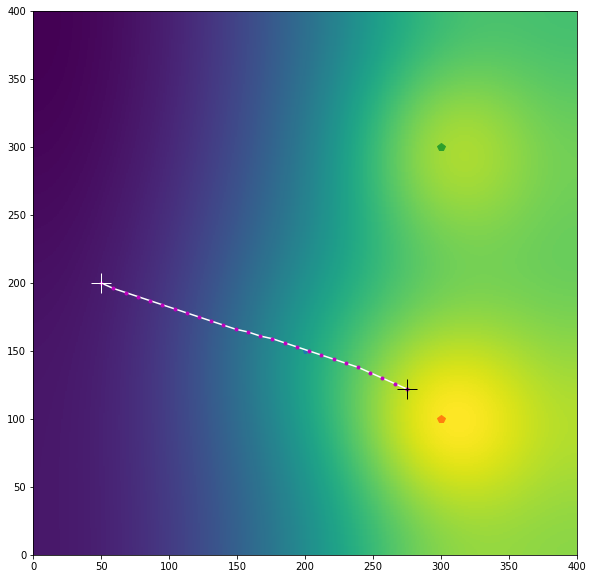

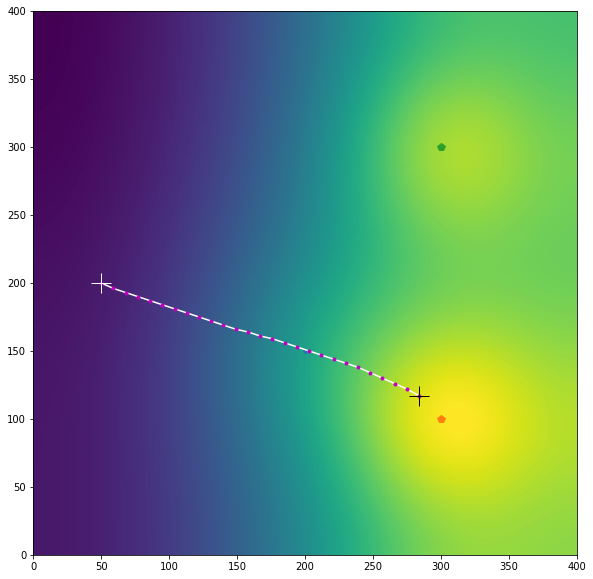

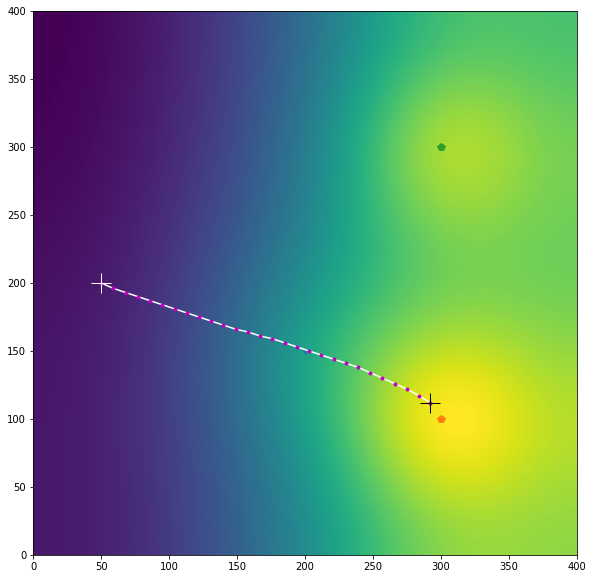

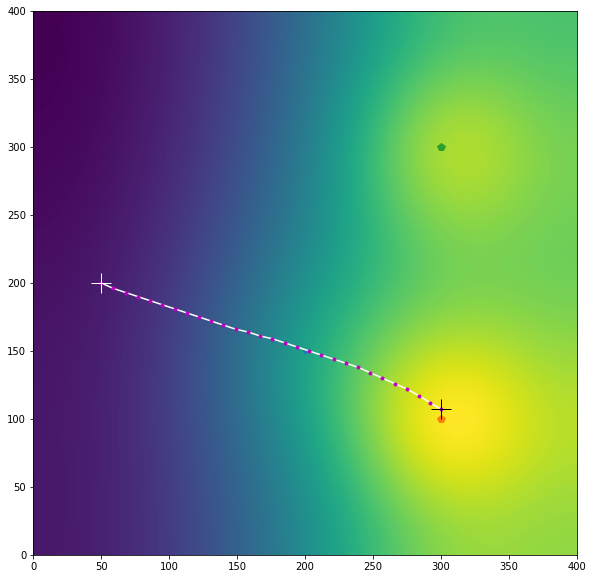

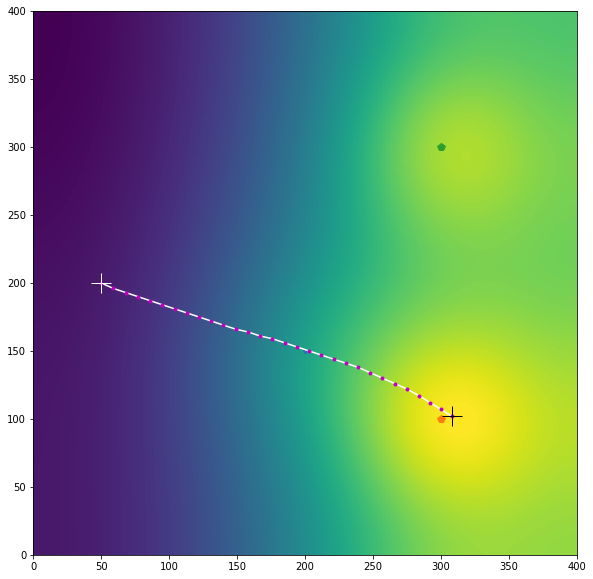

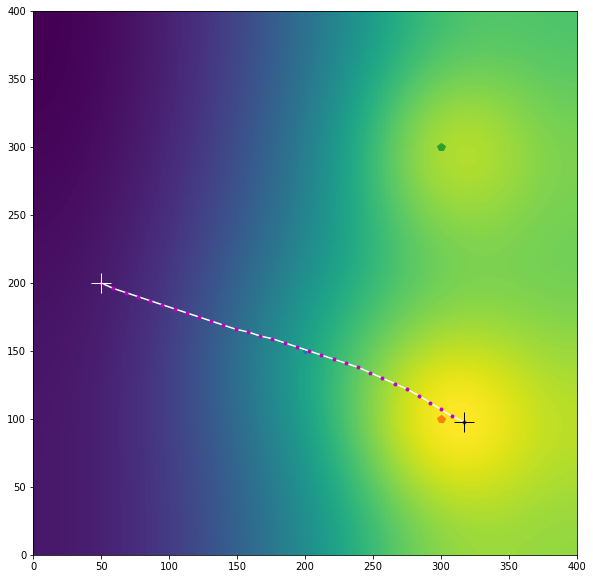

In [22]:
x0 = 50;y0 = 200;stepSize = 10;
x = x0;y = y0;delta = 5; 
I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
trajectory = np.array([[x,y]])

with imageio.get_writer('triplePoint.gif',mode='I') as writer:
  for k in range(50):
    x,y = nextLoc(x,y,I,delta,stepSize)
    trajectory = np.append(trajectory, np.array([[x,y]]), axis=0)
    #I = {'E':z[x+delta,y],'W':z[x-delta,y],'N':z[x,y + delta],'S':z[x,y-delta]}
    z[np.where(dist1<cr1)]= int1+5*cr1*k
    z[np.where(dist2<cr2)]= int2+5*cr2*k
    z[np.where(dist3<cr3)]= int3+5*cr2*k
    try:
      error = sqrt((trajectory[-1,0]-trajectory[-3,0])**2+(trajectory[-1,1]-trajectory[-3,1])**2)
      if error<stepSize:
        break
    except:
      pass   
    
    z = gaussian_filter(z, sigma=50)
    I = {'E':z[y,x+delta],'W':z[y,x-delta],'N':z[y + delta,x],'S':z[y-delta,x]}
    fig=plt.figure(figsize = (10,10))
    ax=fig.add_subplot(111)
    ax.pcolormesh(z)
    ax.set_aspect('equal')
    plt.plot(ci1,cj1,'p', markersize=cr1,label = 'Leak Source 1')
    plt.plot(ci2,cj2,'p', markersize=cr2,label = 'Leak Source 2')
    plt.plot(ci3,cj3,'p', markersize=cr3,label = 'Leak Source 3')
    plt.plot(trajectory[:,0],trajectory[:,1],'w',label = 'trajectory')
    plt.plot(trajectory[:,0],trajectory[:,1],'m.')
    plt.plot(trajectory[0,0],trajectory[0,1],'w+', markersize=20,label = 'Starting Point',)
    plt.plot(trajectory[-1,0],trajectory[-1,1],'k+', markersize=20,label = 'Current Position')
    #plt.legend()
    plt.savefig('this.png')
    image = imageio.imread('this.png')
    writer.append_data(image)  

In [23]:
print('number of iterations taken to settle = ',k)

number of iterations taken to settle =  30
